# AIVLE스쿨 4기 DX트랙 5차 미니프로젝트 
## [미션#2] 중증질환 예측 데이터 분석

 [주의]
 * 본 자료는 임의로 가공된 응급 출동 데이터입니다. 의료적 소견이 전혀 없는 자료임을 참고해 주세요
 * 임의로 가공된 증상 및 중증 질환 결과를 할용하여, 증상에 따른 환자의 중증 질환을 예측하고자 합니다.


[미션] 
 * 증상 데이터 (Features) 와 중증 질환(Target)의 특징 파악 (단변량 분석)
 * 증상 데이터 (Features) 와 중증 질환(Target) 간의 관계 분석 (이변량 분석)
 * AI 모델링을 위한 데이터 전처리 

In [15]:
# 라이브러리 불러오기 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

plt.rcParams['font.family'] = 'Malgun Gothic'

In [16]:
# 응급 출동 데이터 불러오기
# 파일명 119_emergency_dispatch.csv, encoding='cp949'

data = pd.read_csv("./119_emergency_dispatch.csv", encoding="cp949" )
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,0,0,0,0,0,1,0,0,심근경색,8
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,0,1,0,0,0,0,0,0,복부손상,40
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,0,1,0,0,0,0,0,0,복부손상,27
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,0,0,0,0,0,1,0,0,뇌경색,26
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,0,1,0,0,0,0,0,0,복부손상,62


### 1) 데이터셋(data)의 기초 정보 확인하기

In [17]:
# data 데이터프레임의 행, 열 개수 확인
data.shape

(17210, 23)

In [18]:
# data 데이터프레임의 컬럼명, 데이터 개수, 타입 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        17210 non-null  object 
 1   출동일시      17210 non-null  object 
 2   이름        17210 non-null  object 
 3   성별        17210 non-null  object 
 4   나이        17210 non-null  int64  
 5   체온        17210 non-null  float64
 6   수축기 혈압    17210 non-null  int64  
 7   이완기 혈압    17210 non-null  int64  
 8   호흡 곤란     17210 non-null  int64  
 9   간헐성 경련    17210 non-null  int64  
 10  설사        17210 non-null  int64  
 11  기침        17210 non-null  int64  
 12  출혈        17210 non-null  int64  
 13  통증        17210 non-null  int64  
 14  만지면 아프다   17210 non-null  int64  
 15  무감각       17210 non-null  int64  
 16  마비        17210 non-null  int64  
 17  현기증       17210 non-null  int64  
 18  졸도        17210 non-null  int64  
 19  말이 어눌해졌다  17210 non-null  int64  
 20  시력이 흐려짐   17210 non-null  in

In [19]:
# data 데이터프레임의 하위 3개 행 확인
data.tail(3)

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간
17207,P22512,2023-10-20,표**,여자,65,36.9,95,78,0,0,...,0,0,1,0,0,0,1,0,뇌출혈,18
17208,P24482,2023-10-20,채**,남자,14,36.3,105,72,0,0,...,0,0,1,0,0,0,1,0,뇌출혈,60
17209,P27091,2023-10-20,염**,남자,75,36.5,133,78,0,0,...,0,0,0,0,0,0,0,0,복부손상,5


In [20]:
# data 데이터프레임에 결측치 확인 isna(), sum()
# 결측치가 있는 경우, 삭제하기

data.isna().sum()
# data = data.dropna()


ID          0
출동일시        0
이름          0
성별          0
나이          0
체온          0
수축기 혈압      0
이완기 혈압      0
호흡 곤란       0
간헐성 경련      0
설사          0
기침          0
출혈          0
통증          0
만지면 아프다     0
무감각         0
마비          0
현기증         0
졸도          0
말이 어눌해졌다    0
시력이 흐려짐     0
중증질환        0
이송 시간       0
dtype: int64

### 2) 데이터 전처리

* 기존 컬럼을 이용하여 새로운 컬럼을 생성
* 추가해야 할 컬럼 내용
  * 연령구분 : 나이 컬럼을 활용하여 [신생아, 10대미만, 10대, 20대~ 80대, 90이상으로 구분]
  * 출동월 : 출동일시 컬럼을 활용하여 출동월을 추출
  * 발열 : 체온 컬럼을 활용하여, 37도 이상인 경우 1, 이하인 경우 0으로 구분
  * 고혈압 : 수축기 혈압 컬럼을 활용하여 140이상인 경우 1, 그렇지 않으면 0으로 구분
  * 저혈압 : 수축기 혈압 컬럼을 활용하여 90이하인 경우 1, 그렇지 않으면 0으로 구분
  

In [21]:
# 1) 연령구분 정보 구하기
# '나이' 컬럼을 활용하여 [신생아, 10대미만, 10대, 20대~ 80대, 90이상]으로 구분

data['연령구분'] = pd.cut(data['나이'], bins=[-1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 150], 
                     labels=['신생아', '10대미만', '10대','20대','30대','40대','50대','60대','70대','80대','90이상'], right=False)
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,0,0,0,0,1,0,0,심근경색,8,60대
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,1,0,0,0,0,0,0,복부손상,40,80대
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,1,0,0,0,0,0,0,복부손상,27,20대
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,0,0,0,0,1,0,0,뇌경색,26,50대
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,1,0,0,0,0,0,0,복부손상,62,80대


In [22]:
data[data['나이']==39]

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분
80,P17739,2023-09-30,호**,남자,39,36.3,131,66,0,0,...,0,1,0,1,1,0,0,복부손상,62,30대
107,P19174,2023-09-30,단**,여자,39,37.3,118,83,0,0,...,1,0,0,0,0,0,0,복부손상,21,30대
130,P23278,2023-09-29,음**,여자,39,36.9,124,66,0,0,...,0,1,1,0,0,1,0,뇌출혈,31,30대
174,P17125,2023-10-25,진**,여자,39,36.7,103,76,1,0,...,0,0,0,1,1,0,0,심근경색,46,30대
324,P25011,2023-10-12,궁**,여자,39,36.3,99,65,1,0,...,0,0,0,1,1,0,0,심근경색,57,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16808,P13363,2023-10-05,육**,여자,39,36.5,127,71,0,0,...,0,0,0,0,0,0,0,심근경색,18,30대
16858,P11574,2023-10-07,도**,남자,39,36.8,125,75,1,1,...,0,0,0,0,0,0,0,복부손상,29,30대
17017,P20525,2023-10-13,여**,남자,39,36.4,126,72,1,0,...,0,0,0,1,0,1,0,심근경색,6,30대
17022,P23026,2023-10-13,시**,남자,39,36.4,123,84,0,1,...,0,0,0,0,1,1,1,뇌경색,28,30대


In [23]:
data[data['나이'] == 0]

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분


In [24]:
# '연령구분' 컬럼의 고유한 값(범주)별 건수 확인하기 : value_counts()

data['연령구분'].value_counts()

80대      3115
70대      3031
60대      2189
50대      2161
40대      1724
30대      1657
10대      1178
10대미만    1033
20대       720
90이상      402
신생아         0
Name: 연령구분, dtype: int64

In [25]:
# 2) 출동월 정보 구하기
# 출동일자 컬럼에서 출동월 정보를 추출하기

data['출동월'] = data['출동일시'].str[5:7].astype(int)
data.head()

# data['출동월'] = pd.to_datetime(data['출동일시']).dt.month
# data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,0,0,0,1,0,0,심근경색,8,60대,9
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,0,0,0,0,0,0,복부손상,40,80대,10
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,0,0,0,0,0,0,복부손상,27,20대,10
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,0,0,0,1,0,0,뇌경색,26,50대,10
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,0,0,0,0,0,0,복부손상,62,80대,10


In [26]:
# 3) 발열 정보 구하기
# 체온이 37도 이상이면 1, 그렇지 않으면 0

data['발열'] = [ 1 if x >=37 else 0 for x in data['체온']]
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월,발열
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,0,0,1,0,0,심근경색,8,60대,9,0
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,0,0,0,0,0,복부손상,40,80대,10,0
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,0,0,0,0,0,복부손상,27,20대,10,1
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,0,0,1,0,0,뇌경색,26,50대,10,0
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,0,0,0,0,0,복부손상,62,80대,10,1


In [27]:
# 4) 고혈압 정보 구하기
# 수축기 혈압 컬럼을 활용하여 140이상인 경우 1, 그렇지 않으면 0으로 구분

data['고혈압'] = [1 if x >= 140 else 0 for x in data['수축기 혈압']]
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월,발열,고혈압
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,0,1,0,0,심근경색,8,60대,9,0,0
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,0,0,0,0,복부손상,40,80대,10,0,0
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,0,0,0,0,복부손상,27,20대,10,1,0
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,0,1,0,0,뇌경색,26,50대,10,0,0
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,0,0,0,0,복부손상,62,80대,10,1,0


In [28]:
# 5) 저혈압 정보 구하기
# 수축기 혈압이 90이하인 경우 1, 그렇지 않으면 0

data['저혈압'] = [1 if x <= 90 else 0 for x in data['수축기 혈압']]
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분,출동월,발열,고혈압,저혈압
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,1,0,0,심근경색,8,60대,9,0,0,0
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,0,0,0,복부손상,40,80대,10,0,0,0
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,0,0,0,복부손상,27,20대,10,1,0,0
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,1,0,0,뇌경색,26,50대,10,0,0,0
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,0,0,0,복부손상,62,80대,10,1,0,0


### 3) 단변량 분석 - 범주형 데이터

* 대상 : 중증질환/연령구분

In [29]:
# 중증질환 통계
# '중증질환' 컬럼의 고유한 값(범주) 별 개수 카운트

data['중증질환'].value_counts()

복부손상    4608
뇌경색     4224
심근경색    4097
뇌출혈     4096
중증아님     151
조산산모      12
신생아        9
사지접합       7
중증화상       6
Name: 중증질환, dtype: int64

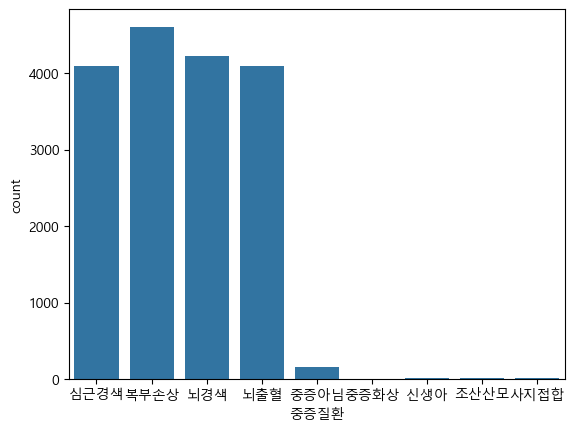

In [30]:
# seaborn 라이브러리의 countplot 함수을 사용하여 '중증질환' 컬럼의 범주별 개수 시각화 

sns.countplot(data=data, x='중증질환')
plt.show()

* 중증 질환 중 [심근경색, 복부손상, 뇌경색, 뇌출혈]에 대한 자료만 추출하여 분석

In [31]:
# data 데이터프레임에서 '중증질환'값이 ['심근경색', '복부손상', '뇌경색', '뇌출혈'] 에 포함되는 경우만을 추출하여 desease 변수에 저장
# 이후 desease 데이터 프레임을 활용하여 분석

desease = data[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]

In [32]:
# desease의 '중증질환' 컬럼의 고유한 값(범주) 별 개수 카운트

desease['중증질환'].value_counts()

복부손상    4608
뇌경색     4224
심근경색    4097
뇌출혈     4096
Name: 중증질환, dtype: int64

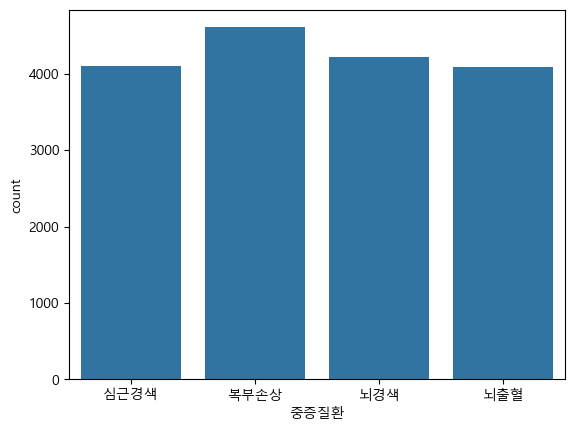

In [33]:
# seaborn 라이브러리의 countplot 함수을 사용하여 desease 데이터프레임의 '중증질환' 컬럼의 범주별 개수 시각화 

sns.countplot(data=desease, x='중증질환')
plt.show()

In [34]:
# 질문) 어느 중증질환에 출동 건수가 많았나요?
# 질문) 중증질환별 출동 건수에 차이가 있나요?



In [35]:
# '연령구분' 컬럼의 고유한 값(범주) 별 개수 카운트
desease['연령구분'].value_counts()

80대      3091
70대      3002
60대      2158
50대      2143
40대      1703
30대      1626
10대      1175
10대미만    1022
20대       708
90이상      397
신생아         0
Name: 연령구분, dtype: int64

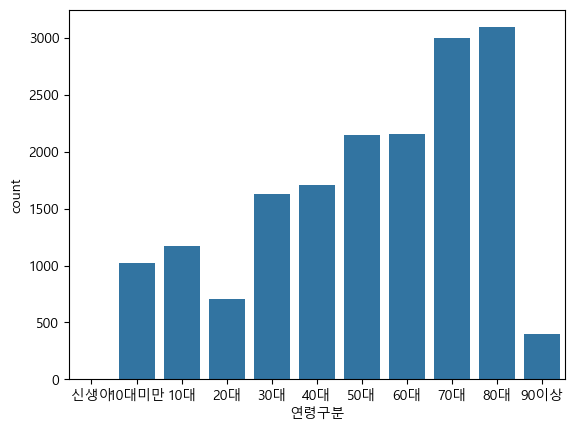

In [36]:
# seaborn 라이브러리의 countplot 함수을 사용하여 desease 데이터프레임의 '연령구분' 컬럼의 범주별 개수 시각화 

sns.countplot(data=desease, x='연령구분')
plt.show()

In [37]:
#질문) 어느 연령대가 가장 많은가요?
#질문) 연령대별로 출동 건수의 차이가 있나요?




### 4) 단변량 분석 - 숫자형 데이터
* 대상 : 체온

In [38]:
# 체온 컬럼에 대한 기초 통계 정보 확인하기, describe()

desease['체온'].describe()

count    17025.000000
mean        36.599424
std          0.635970
min         36.000000
25%         36.200000
50%         36.500000
75%         36.800000
max         39.900000
Name: 체온, dtype: float64

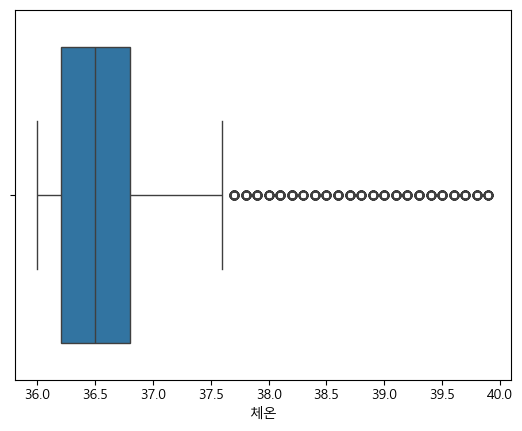

In [39]:
# seaborn의 boxplot을 이용하여 '체온' 컬럼의 분포를 시각화

sns.boxplot(data=desease, x='체온')
plt.show()

In [40]:
# 질문) 체온 컬럼의 데이터 분포는 어떠한가?
# 질문) 체온 컬럼의 데이터에 이상치가 존재하는가? 
# 질문) 이상치 데이터는 제거해야 하는가? 아니면 유지해야 하는가?



### 5) 이변량 분석 - 범주 vs 범주

 * Target : 중증 질환
 * Feature : 성별, 연령구분, 출동월, 증상 리스트

In [41]:
# 1) Feature : 성별, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 성별로 중증 질환에 차이가 없다
# 대립 가설 : 성별로 중증 질환에 차이가 있다.

In [42]:
# pandas의 crosstab을 이용하여 집계
# 변수명 : cross_sex
cross_sex = pd.crosstab(desease['성별'], desease['중증질환'])

# 통계 검증 : 카이제곱 검증 (chi2_contingency) 
# 상관계수와 p-value 확인

chi2_sex = spst.chi2_contingency(cross_sex)
chi2_sex

Chi2ContingencyResult(statistic=1.6323358900287734, pvalue=0.6520803009584115, dof=3, expected_freq=array([[2349.06502203, 2277.88123348, 2562.61638767, 2278.43735683],
       [1874.93497797, 1818.11876652, 2045.38361233, 1818.56264317]]))

In [43]:
# 2) Feature : 연령 구분, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 연령 구분대별로 중증 질환에 차이가 없다
# 대립 가설 : 연령 구분대별로 중증 질환에 차이가 있다.

In [44]:
# pandas의 crosstab을 이용하여 feature, target 범주값에 대한 교차 빈도 확인
# 변수명 : cross_age

cross_age = pd.crosstab(desease['연령구분'], desease['중증질환'])

# 통계 검증 : 카이제곱 검증 (chi2_contingency) 
# 상관계수와 p-value 확인

chi2_age = spst.chi2_contingency(cross_age)
chi2_age

Chi2ContingencyResult(statistic=20.724015260209008, pvalue=0.7990422063221734, dof=27, expected_freq=array([[253.56405286, 245.88029369, 276.6153304 , 245.94032305],
       [291.52422907, 282.69016153, 318.02643172, 282.75917768],
       [175.65885463, 170.33585903, 191.62784141, 170.37744493],
       [403.41991189, 391.19506608, 440.09444934, 391.29057269],
       [422.52405286, 409.72029369, 460.9353304 , 409.82032305],
       [531.69057269, 515.57873715, 580.0260793 , 515.70461087],
       [535.41215859, 519.18754772, 584.08599119, 519.3143025 ],
       [744.81339207, 722.24328928, 812.52370044, 722.41961821],
       [766.89480176, 743.65556535, 836.61251101, 743.83712188],
       [ 98.49797357,  95.51318649, 107.4523348 ,  95.53650514]]))

In [120]:
# 3) Feature : 출동월, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 출동월별로 중증 질환에 차이가 없다
# 대립 가설 : 출동월별로 중증 질환에 차이가 있다.

In [121]:
# pandas의 crosstab을 이용하여 feature, target 범주값에 대한 교차 빈도 확인
# 변수명 : cross_month

cross_month = pd.crosstab(desease['출동월'], desease['중증질환'])

# 통계 검증 : 카이제곱 검증 (chi2_contingency) 
# 상관계수와 p-value 확인

chi_month = spst.chi2_contingency(cross_month)
chi_month

Chi2ContingencyResult(statistic=27.42678513398077, pvalue=0.6007840032980716, dof=30, expected_freq=array([[313.85374449, 304.34302496, 342.38590308, 304.41732746],
       [374.63964758, 363.28693098, 408.69779736, 363.37562408],
       [457.0107489 , 443.16193833, 498.55718062, 443.27013216],
       [425.99753304, 413.08851689, 464.7245815 , 413.18936858],
       [447.08651982, 433.53844347, 487.7307489 , 433.64428781],
       [427.98237885, 415.01321586, 466.88986784, 415.11453744],
       [449.81568282, 436.18490455, 490.70801762, 436.29139501],
       [444.60546256, 431.13256975, 485.02414097, 431.23782673],
       [446.34220264, 432.81668135, 486.91876652, 432.92234949],
       [429.22290749, 416.21615272, 468.24317181, 416.31776799],
       [  7.44317181,   7.21762115,   8.11982379,   7.21938326]]))

In [122]:
# 4) Feature : 증상리스트, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 각 증상별로 중증 질환에 차이가 없다
# 대립 가설 : 각 증상별로 중증 질환에 차이가 있다.

In [123]:
# 증상 리스트 

symptom = ['호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도',
       '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']

In [124]:
# for문을 이용하여 각 증상과 중증질환과의 카이제곱 검증 시행

for one_sym in symptom:
    # pandas의 crosstab을 이용하여 feature, target 범주값에 대한 교차 빈도 확인
    # 변수명 : cross_sym
    cross_sym = pd.crosstab(desease[one_sym], desease['중증질환'])

    # 통계 검증 : 카이제곱 검증 (chi2_contingency) 
    # 상관계수와 p-value 확인

    chi2_sym = spst.chi2_contingency(cross_sym)

    ## P-value (chi2_sym[1]) 값이 0.05보다 크면 귀무가설 채택, 0.05보다 작으면 대립가설 채택
    if chi2_sym[1] > 0.05:
        print("귀무가설 채택", one_sym, "에 따라 중증 질환에 차이가 없다. P-value ", chi2_sym[1])
    else:
        print("대립가설 채택", one_sym, "에 따라 중증 질환에 차이가 있다. P-value ", chi2_sym[1])
    

대립가설 채택 호흡 곤란 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 간헐성 경련 에 따라 중증 질환에 차이가 있다. P-value  4.787738645829797e-258
대립가설 채택 설사 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 기침 에 따라 중증 질환에 차이가 있다. P-value  9.191766041358234e-233
대립가설 채택 출혈 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 통증 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 만지면 아프다 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 무감각 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 마비 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 현기증 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 졸도 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 말이 어눌해졌다 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 시력이 흐려짐 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 발열 에 따라 중증 질환에 차이가 있다. P-value  8.776251786570273e-200
대립가설 채택 고혈압 에 따라 중증 질환에 차이가 있다. P-value  0.0038235366142048447
대립가설 채택 저혈압 에 따라 중증 질환에 차이가 있다. P-value  2.867081511918155e-39


In [126]:
# 질문) 범주형 vc 범주형 이변량 분석 결과를 정리하세요



### 6) 이변량 분석 - 숫자형 vc 범주형

 * Target : 중증 질환
 * Feature : 나이, 체온, 수축기 혈압, 이완기 혈압

In [127]:
# 가설 수립
# 귀무 가설 : feature에 따라 중증 질환에 차이가 없다
# 대립 가설 : feature에 따라 중증 질환에 차이가 있다.

In [128]:
# anova 분석 대상 리스트 확인

anova_column = ['나이', '체온', '수축기 혈압', '이완기 혈압']

# for문을 이용하여 feature 데이터 하나씩 순차적으로 분석하기 
# 중증질환별로 feature 데이터를 분리하고, anova 검증 결과를 확인

for one_column in anova_column:
    # 중증질환별로 데이터 분리하기
    Class_1= desease.loc[desease['중증질환'] == "뇌출혈", one_column]
    Class_2= desease.loc[desease['중증질환'] == "뇌경색", one_column]
    Class_3= desease.loc[desease['중증질환'] == "복부손상", one_column]
    Class_4= desease.loc[desease['중증질환'] == "심근경색", one_column]

    # 통계 검증 : anova검증 (f_oneway)
    result  = spst.f_oneway(Class_1, Class_2, Class_3, Class_4)

    # p-value 확인하기
    print(result)
    print(result[1])
    

F_onewayResult(statistic=0.9753355966078867, pvalue=0.4032008856528455)
0.4032008856528455
F_onewayResult(statistic=201.86344415603827, pvalue=1.1727742884213586e-128)
1.1727742884213586e-128
F_onewayResult(statistic=7.310971381793121, pvalue=6.779786822766033e-05)
6.779786822766033e-05
F_onewayResult(statistic=12.692008838060291, pvalue=2.7791745009929158e-08)
2.7791745009929158e-08


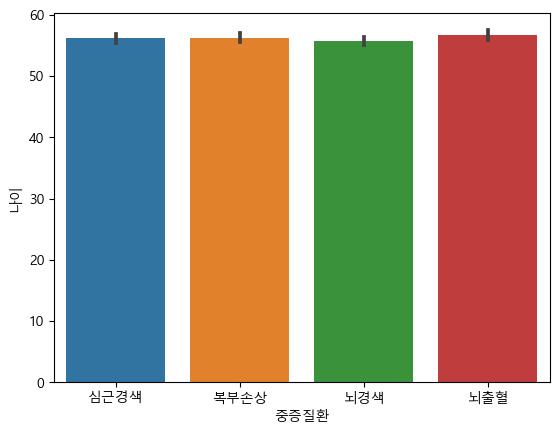

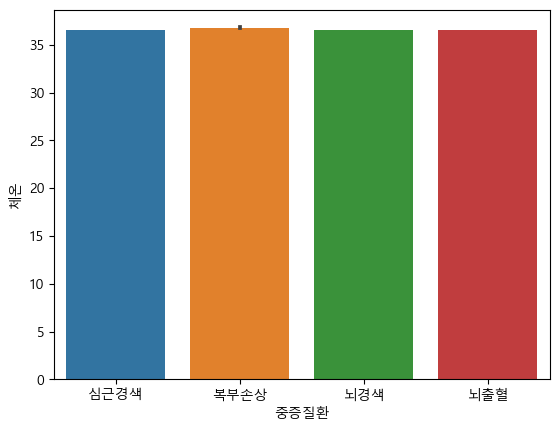

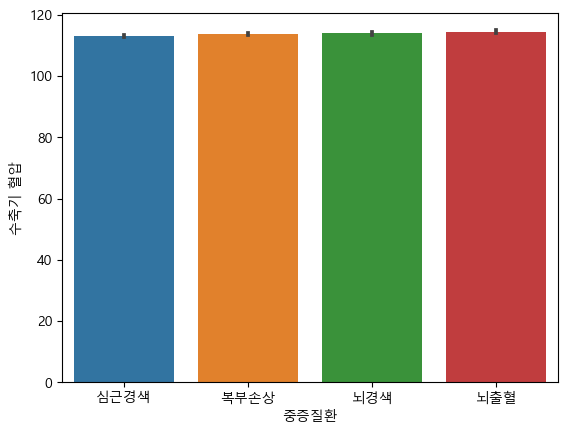

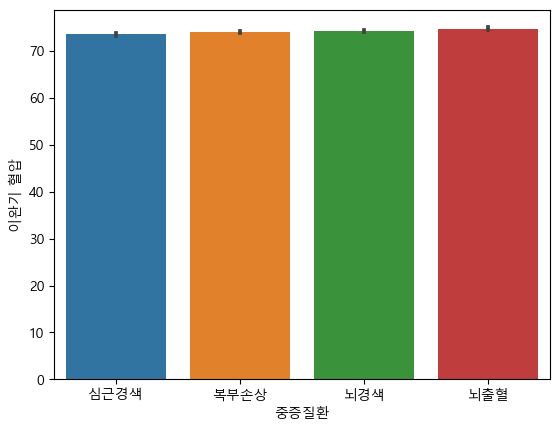

In [129]:
# for문을 이용하여 feature 데이터 하나씩 순차적으로 분석하기 
# seaborn의 barplot 활용하여 중증질환별 feature값 분포의 차이를 시각화

for one_column in anova_column:
    sns.barplot(data=desease, x='중증질환', y=one_column)
    plt.show()

In [130]:
# 질문) 숫자형 vc 범주형 이변량 분석 결과를 정리하세요



### 7) 데이터 분석 결과

In [131]:
# 질문) 데이터 분석 결과, AI 모델링에 반영할 Feature는 무엇인가요?





### 8) 데이터 전처리 함수 만들기

 * 함수로 전처리 과정을 정의
   * 1. 함수 선언하기
   * 2. 데이터 전처리 하기 : 발열, 고혈압, 저혈압
   * 3. Y에 Target(중증질환) 값 넣기
   * 4. X에 위 분석 결과에서 선택된 Feature들 넣기
   * 5. X, Y 반환하기
 

In [132]:
#########################################
# 1. 함수 선언하기                       #
#########################################
# 함수명 : preprocessing
# 매개변수 : desease (응급 출동 데이터 중 중증 질환이 ['심근경색', '복부손상', '뇌경색', '뇌출혈']인 데이터프레임)

def preprocessing(desease):

    desease = desease.copy()
    #########################################
    # 2. 데이터 전처리 하기                  #
    #########################################
    
    # '발열' 컬럼 구하기 : 체온이 37도 이상이면 1, 아니면 0
    desease['발열'] = [ 1 if x >=37 else 0 for x in desease['체온']]

    # '고혈압' 칼럼 구하기 : 수축기 혈압이 140 이상이면 1, 아니면 0
    desease['고혈압'] = [1 if x >= 140 else 0 for x in desease['수축기 혈압']]

    # '저혈압' 칼럼 구하기 : 수축기 혈압이 90 이하이면 1, 아니면 0
    desease['저혈압'] = [1 if x <= 90 else 0 for x in desease['수축기 혈압']]
    

    #########################################
    # 3. X에 선택된 Feature값 넣기           #
    #########################################
    # X : '중증질환' 및 데이터분석에서 Target에 영향을 주지 않는 칼럼 제외한 나머지
    X = desease[['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란','간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', 
           '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']]
    
    #########################################
    # 4. X 반환하기                       #
    #########################################

    return X

In [133]:
## 확인하기

data = pd.read_csv("./119_emergency_dispatch.csv", encoding="cp949" )
desease = data[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]

X = preprocessing(desease)
print(X.shape)
X.head()

(17025, 19)


,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,설사,기침,출혈,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,발열,고혈압,저혈압
0,36.9,102,66,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,36.7,106,72,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,38.1,120,77,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,36.5,129,75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,39.1,103,65,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


## 미션#2 Clear
## 수고하셨습니다!!